## Explaining the Difference Between Logistic Regression and Support Vector Machines 

### <u> Logistic Regression Overview </u>

The basic description of a Logistic Regression Model is it models the probability that an observation belongs to a certain class. It uses the logistic sigmoid function to map a linear combination of features to a probability. It is a classification model that is simple to implement and performs very well on linearly separable classes. It is actually one of the most widely used algorithms in industry because of its interpretability of features and their probabilistic relationship to the target class variable. You could think of using this algorithm when wanting to have a good interpretable model.

### <u> Support Vector Machines Overview </u>

SVM's is an extension of the perceptron algorithm where we originally minimized misclassification errors however with this extended version our optimization objective is to maximize the margin. The margin can be defined as the distance between the separating hyperplanes and the training examples that are closest to this hyperplane which are the so-called support vectors that define the boundary. It focuses on finding the decision boundary (hyperplane) that maximizes the margin between classes. You could think of using this algorithm when wanting the have to cleanest separation possible between classes. 

### <u>What are the advantages of each model for classification tasks?</U>

Binary Classifications with Probabilities:
- Logistic Regression is the best choice because it produces well calibrated probabilities and coefficients are directly interpretable. SVM outputs distances, not probabilities and probability calibration adds complexity and instability. 

Linearly Separable Classes:
- Both Logistic Regression and SVM are good however choosing Logistic Regression would be better for interpretability and faster training time. Choosing SVM would be better for slightly better margins/accuracy and has stronger performance for high dimensional data.

High Dimensional Sparse Data (Text/NLP/Many Features):
- SVM is the best since it is designed for high-dimensional spaces, less affected by the curse of dimensionality because it relies on support vectors that is directly related to the structure of the train data. Logistic Regression is still competitive but requires stronger regularization and can overfit without tuning.

Non-Linear Decision Boundaries:
- SVM is the best because it has the Kernel parameter which is also known as the kernel trick that allows the model to learn complex non-linear boundaries where as logistic regression requires manual feature engineering and polynomial expansion increases dimensionality fast which is hurtful to the logistic regression model.

Small to Medium Datasets:
- SVM is the best because margin maximization reduces overfitting and performs well with limited data. Logistic regression can overfit if regularization is weak and needs more data for stable probability estimates.

Large-Scale Production Systems:
- Logistic Regression is the best choice because they not only are memory efficient and scalable but also good for getting fast training and inference. Kernal SVM's do not scale well and training time grows quickly with data size.

Imbalanced Classification Problems:
- Best choice is logistic regression as it works naturally with class weights while as SVM is sensitive to margin distortion and requires careful tuning of C and class weights.

Multiclass Classification:
- Logistic Regression in most cases because it produces class probabilities that are both stable and interpretable. SVM's typically scale poorly with many classes.

### <u>Does one type of model offer superior performance over another (accuracy, training time, efficiency)?</u>

| Aspect | Logistic Regression | Support Vector Machines |
|----------|----------|----------|
| Training Speed |  <center> Fast </center> | <center> Slower (esp. with Kernal) </center> |
| Works with Large Datasets | <center> Yes </center> | <center> Kernal SVM's: No </center> |
| High Dimensional Data | <center> Good </center> | <center> Very Good </center> |
| Accuracy | <center> Good </center> | <center> Slightly Better </center> |
| Interpretability | <center> Better </center> | <center> Harder </center> |


### <u>Use Cases of Each Model</u>

Logistic Regression:
- You need interpretable coefficients/features
- Probabilities matter (e.g Risk Scores, Medical Decisions)
- Dataset is large and mostly linear
- You want a strong baseline model

Support Vector Machines:
- Accuracy is more important that interpretability
- Data is complex and possibly non-linear
- You have a medium-sized dataset
- Feature space is high dimensional (e.g Text, Many Features)

### <u>Which Model Best Suits our Data and Classification Task?</u>

To see what these models give us based on our data let us start by training a Logistic Regression Model and a Support Vector Machine on all 13 variables for our feature space.

In [10]:
import pandas as pd

df = pd.read_csv("../Student Placement Dataset/full_dataset.csv")

# All Feature Except Target
numeric_features = [
    'Age',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Communication_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]
categorical_features = [
    'Branch',
    'Degree',
    'Gender'
]

# Target Column
target_col = "Placement_Status"  # change if needed
X = df[numeric_features + categorical_features]

# Encode the target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["Placement_Status"])

# Train/Test Split (80/20) ------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class balance
)

# Preprocessing (Encoding + Scaling) ----------------------------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Logistic Regression --------------------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred_lr = log_reg_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# SVM Classifier -----------------------------------------------------------------------------------------
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.8666
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6375
           1       0.82      0.80      0.81      3625

    accuracy                           0.87     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.87      0.87      0.87     10000

SVM Accuracy: 0.9824
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6375
           1       0.98      0.97      0.98      3625

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Right off the bat we can see the accuracy is much higher on the Support Vector Machine then the Logistic Regression model and this is because of what we said before with SVM's goal of having the best separation possible between classes which in turn results in a higher accuracy when running our test set. Also because of our 13-dimension feature space the SVM handles more complex and possibly non-linear data more effectively than Logistic Regression. 

We can visualize the decision boundary of both classifiers by projecting the 13 features onto a 2-D subspace via PCA using 2 primary component for a better explanation of the results.

In [11]:
# Transform your data (after preprocessing)
from sklearn.decomposition import PCA

# Use the SAME preprocessing as your model
X_train_processed = log_reg_pipeline.named_steps["preprocessor"].fit_transform(X_train)

# Reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)

# Print class order for interpretation of visuals
print("Classes in order:", le.classes_)
for i, cls in enumerate(le.classes_):
    print(f"{cls} --> {i}")

Classes in order: ['Not Placed' 'Placed']
Not Placed --> 0
Placed --> 1


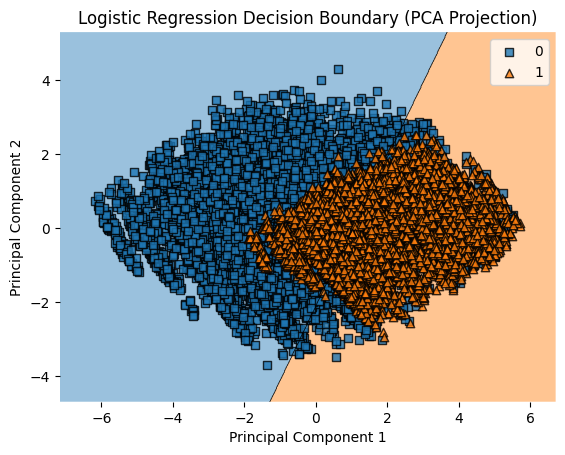

In [12]:
# Plot decision regions for Logistic Regression in PCA space
from mlxtend.plotting.decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

# Train a classifier on PCA space
from sklearn.linear_model import LogisticRegression

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)

# Plotting decision regions for Logistic Regression in PCA space
plot_decision_regions(
    X=X_train_pca,
    y=y_train.values if hasattr(y_train, "values") else y_train,
    clf=lr_pca
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right")
plt.title("Logistic Regression Decision Boundary (PCA Projection)")
plt.show()

This is the calculated decision boundary for the Logistic Regression Model. As we can see the shape of the line of separation between classes is not linear, in fact the two classes are very close to each other, but Logistic Regression forces a linear boundary leading to some incorrect classifications. However, this model is more reliable as it gives a better probabilistic idea on unseen subjects that are not included in our test data. This makes this model more interpretable for the factors that affect the probability of one being placed in a job. Also notice this model rendered quite fast.

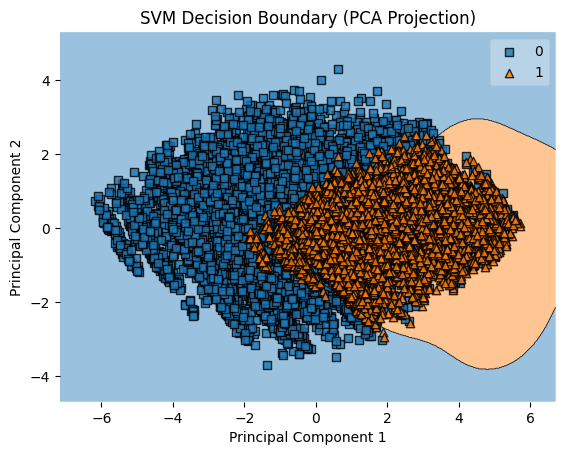

In [13]:
# Plot decision regions for SVM in PCA space
from sklearn.svm import SVC

# Train a classifier on PCA space
svm_pca = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_pca.fit(X_train_pca, y_train)

# Plotting decision regions for SVM in PCA space
plot_decision_regions(
    X=X_train_pca,
    y=y_train.values if hasattr(y_train, "values") else y_train,
    clf=svm_pca
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary (PCA Projection)")
plt.show()

This is the calculated decision boundary for the Support Vector Machine. We can see the boundary follows the curved shape of the separation between the classes. As we said before we would use an SVM if we wanted to have the cleanest separation possible. This shows the decision boundary being formed from the support vectors that follow the subset of points that lay on the hyperplane boundaries of both classes that have the highest margin of separation. This clean separation leads to more accurate classifications, however, is less reliable for unseen test sets so it is less interpretable, almost too perfect which defines the term overfitting. Also notice the render time for this model took significantly longer indicating what we said previously about long training times with SVM's. 

### <u>Conclusion on What Model to Select</u>

For our dataset and classification task, it really depends on what insight we want from our output. We could either go down the path of using Logistic Regression because of it's high interpretability and curiosity to find which factors most influence job placement outcomes and is less computationally expensive. Or choosing a support vector machine to get a more accurate model with respect to our test dataset, that is able to handle a higher dimensional training set like the Student Placement data we are working with but is computationally more expensive.